In [13]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt

In [5]:
m = 2

def qq(u):
    return (1+u)**2

In [6]:
# Set up the mesh and create finite element space relative to the mesh
mesh = UnitSquareMesh(16, 16, "crossed")
V = FunctionSpace(mesh, "Lagrange", 2)

In [7]:
# Define boundary condition u = 0 at x = 0, u = 1 at x = 1.
def left_boundary(x):
    return near(x[0], 0, DOLFIN_EPS_LARGE)

def right_boundary(x):
    return near(x[0], 1.0, DOLFIN_EPS_LARGE)

bcl = DirichletBC(V, Constant(0.0), left_boundary)
bcr = DirichletBC(V, Constant(1.0), right_boundary)
bcs = [bcl, bcr]

In [8]:
# Define variational problem for Picard iterationi
u = TrialFunction(V)
v = TestFunction(V)
u_k = interpolate(Constant(0.0), V)    # previous (known) solution u
f = Constant(0.0)

a = dot(qq(u_k) * grad(u), grad(v)) * dx    # bilinear form
L = Constant(0.0) * v * dx                  # linear form

In [21]:
# Picard iterations
w = Function(V)       # new unknown function (solution at new iteration)
eps = 1.0             # error measure ||u - u_k||
TOL = 1E-5            # tolerance for convergence test
iter_count = 0        # iteration counter
maxIter = 25          # max no. of iterations allowed
w = interpolate(Constant(0.0), V)
u_k.assign(w)
while (eps > TOL) and (iter_count < maxIter):
    iter_count += 1
    solve(a == L, w, bcs)
    difference = w.compute_vertex_values() - u_k.compute_vertex_values()
    eps = np.linalg.norm(difference, ord=np.Inf)
    print("Iteration #%d: norm = %g" %(iter_count, eps))
    # update for next iteration
    u_k.assign(w)

Iteration #1: norm = 1
Iteration #2: norm = 0.171528
Iteration #3: norm = 0.0151634
Iteration #4: norm = 0.00684833
Iteration #5: norm = 0.000874407
Iteration #6: norm = 0.000315785
Iteration #7: norm = 4.98171e-05
Iteration #8: norm = 1.44204e-05
Iteration #9: norm = 2.73723e-06


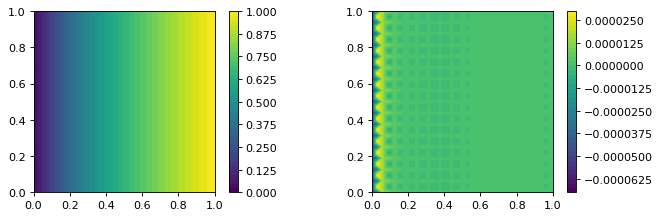

In [48]:
u_exact = Expression("pow(7*x[0] + 1, 1.0/3) - 1", degree = 3)

plt.figure(figsize=(10, 3), dpi=80)
plt.subplot(1, 2, 1)
plt.colorbar(plot(w))
plt.subplot(1, 2, 2)
plt.colorbar(plot(w - project(u_exact, V)))